In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/Heart Disease data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#All Columns in the Dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#Checking NULL Values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
corr=data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

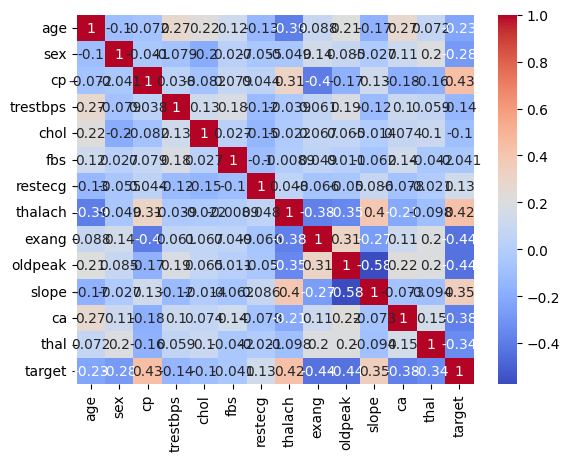

In [7]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [8]:
target=data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [9]:
#Converting Numerical Data into Categorical Data
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [10]:
#Applying converted data into our dataset with new column - Heart_Disease
data['Heart_Disease']=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [11]:
hd=data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

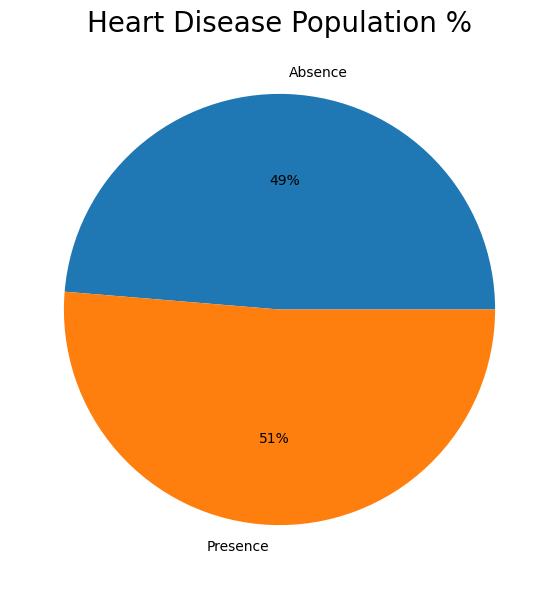

In [12]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib
plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

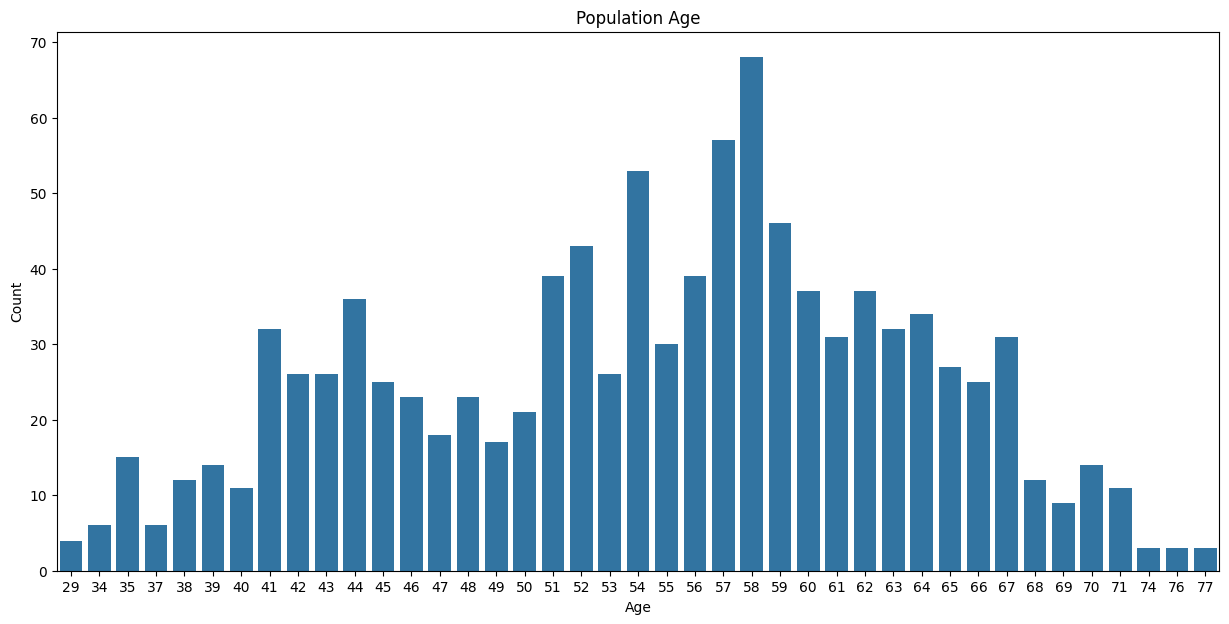

In [13]:
#Countplot Creation of Population Age using MatplotLib and Seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
#Statistical Analysis
Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [15]:
#Categorical Analysis
Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


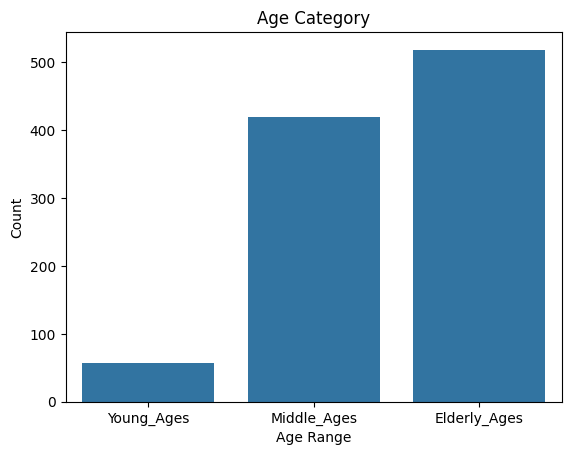

In [16]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)])
plt.title('Age Category')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [17]:
#Converting Numerical Data into Categorical Data
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [18]:
#Applying converted data into our dataset with new column - sex1
data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [19]:
#Converting Numerical Data into Categorical Data
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [20]:
#Applying converted data into our dataset with new column - Age_Range
data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


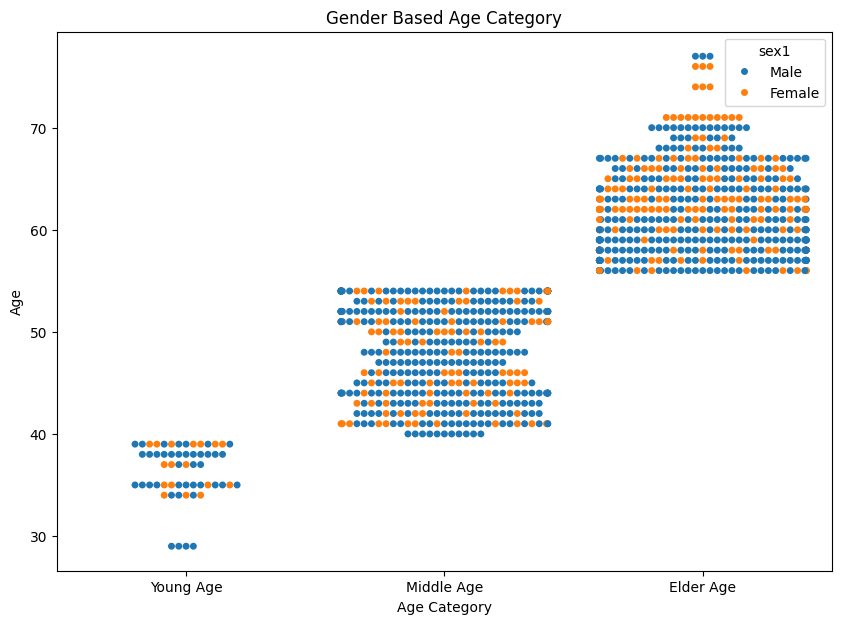

In [21]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'])
plt.title('Gender Based Age Category')
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.show()

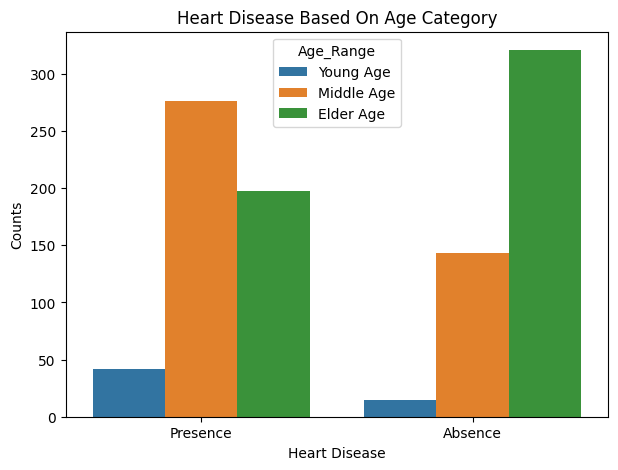

In [22]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order)
plt.title('Heart Disease Based On Age Category')
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.show()

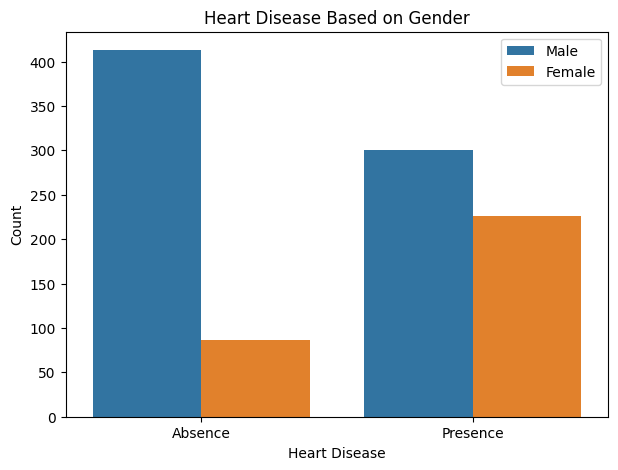

In [23]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender')
plt.show()

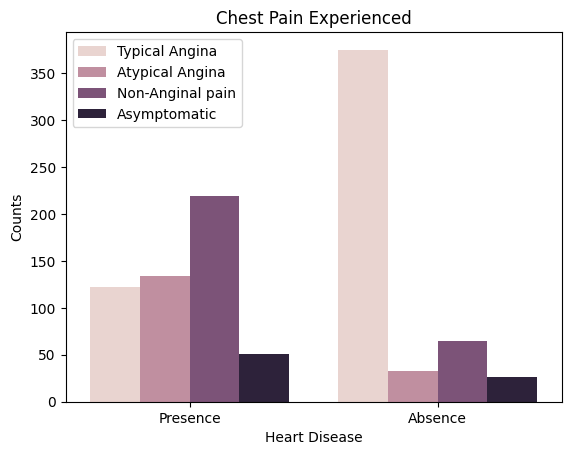

In [24]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn
sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced')
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

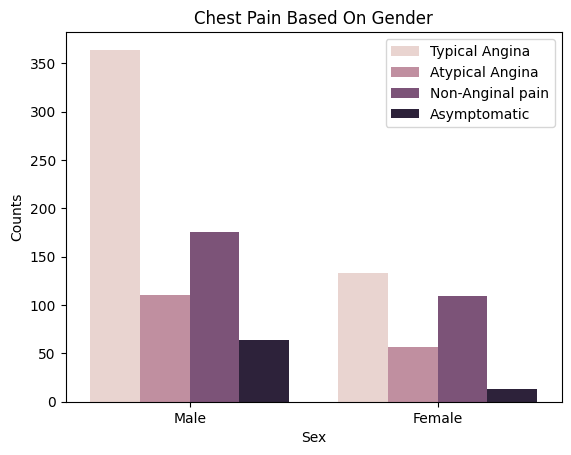

In [25]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn
sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

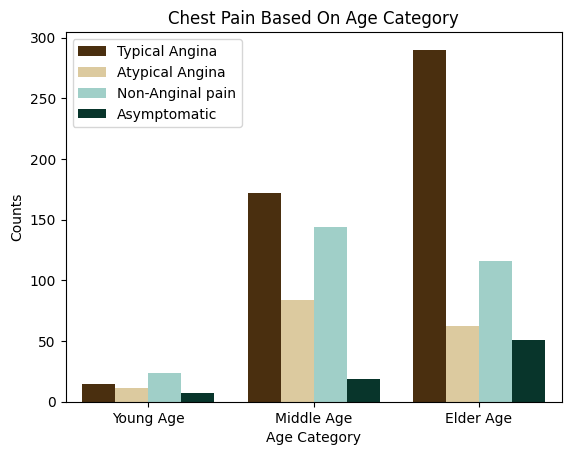

In [26]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category')
plt.xlabel('Age Category')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

<ipython-input-27-c16475614125>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')


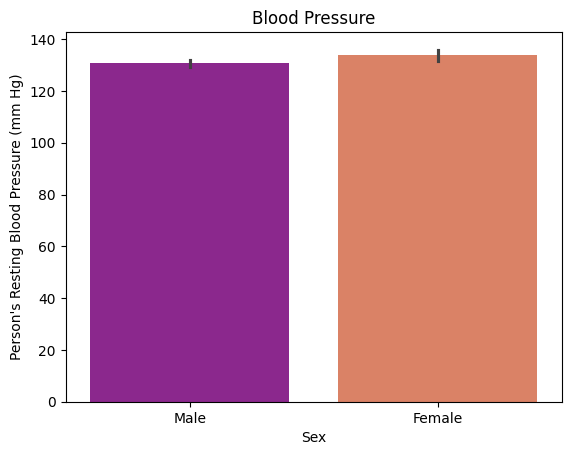

In [27]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn
sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure")
plt.xlabel('Sex')
plt.ylabel("Person's Resting Blood Pressure (mm Hg)")
plt.show()

<ipython-input-28-404723eeae3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='chol', data=data, palette='turbo')


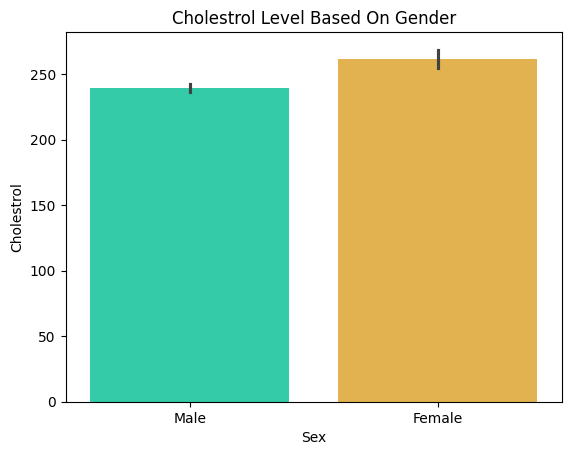

In [28]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
sns.barplot(x='sex1', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender")
plt.xlabel('Sex')
plt.ylabel("Cholestrol")
plt.show()

<ipython-input-29-2ddf010702f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')


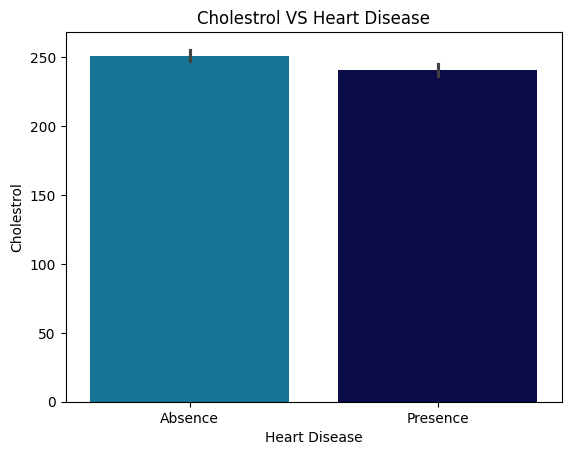

In [29]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholestrol')
plt.show()

<ipython-input-30-07bd31bb81e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')


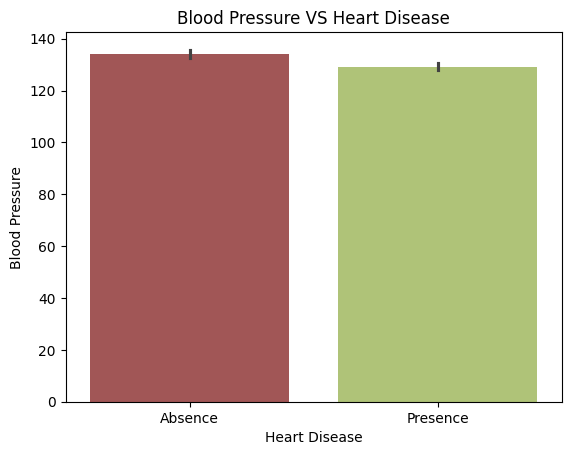

In [30]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Blood Pressure')
plt.show()

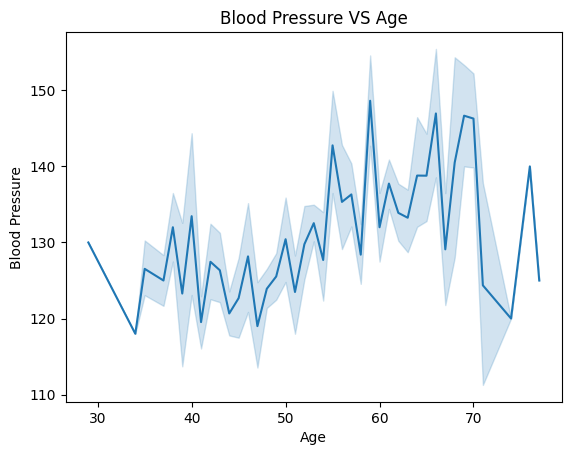

In [31]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn
sns.lineplot(x='age', y='trestbps', data=data)
plt.title('Blood Pressure VS Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

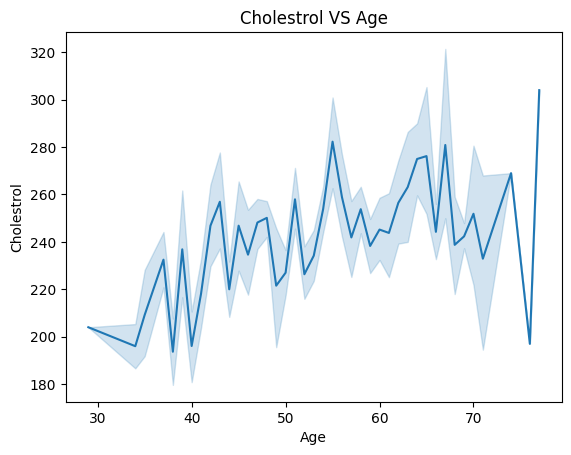

In [32]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn
sns.lineplot(x='age', y='chol', data=data)
plt.title('Cholestrol VS Age')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

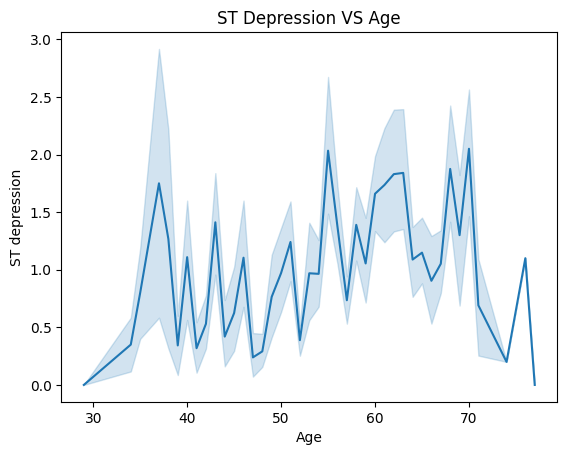

In [33]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn
sns.lineplot(x='age', y='oldpeak', data=data)
plt.title('ST Depression VS Age')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.show()

<ipython-input-34-b2bd6e9e7501>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')


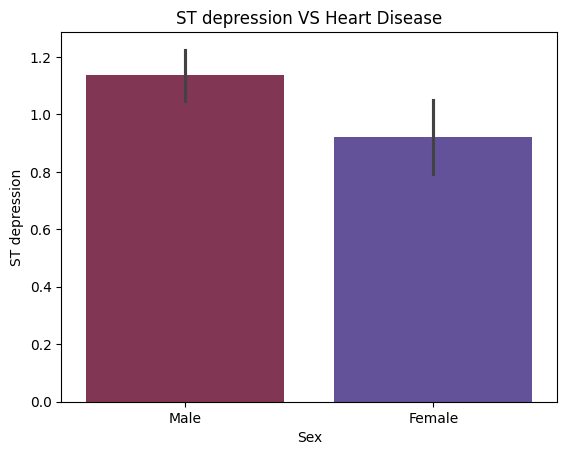

In [34]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease')
plt.xlabel('Sex')
plt.ylabel('ST depression')
plt.show()

<ipython-input-35-bfec37acdd5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')


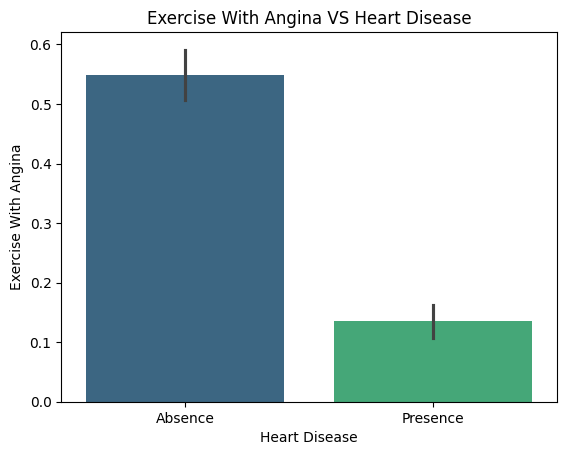

In [35]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Exercise With Angina')
plt.show()


<ipython-input-36-6afdb2dfadbe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')


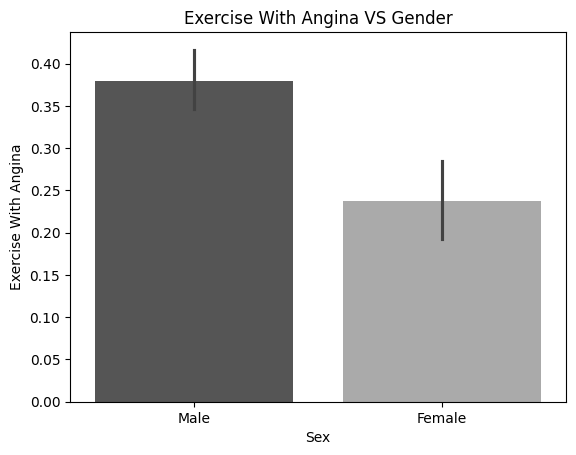

In [36]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn
sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender')
plt.xlabel('Sex')
plt.ylabel('Exercise With Angina')
plt.show()

<ipython-input-37-62012e7f4018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')


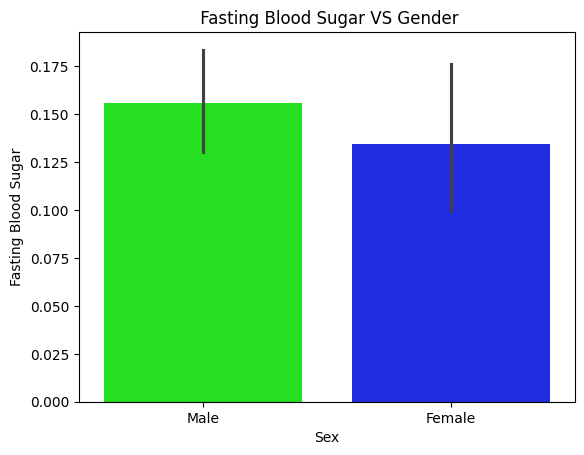

In [37]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn
sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender')
plt.xlabel('Sex')
plt.ylabel('Fasting Blood Sugar')
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
# Defining the feature columns and target variable
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Splitting the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [44]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [45]:
# Printing the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7951219512195122
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

